# AI Workshop - Lab 2-1: Decision Trees and Neural Networks

In this lab, we will build on concepts introduced earlier by diving deeper into two powerful machine learning techniques: **decision trees** and **neural networks**. We'll explore their strengths, limitations, and practical applications using real-world datasets.

### Objectives
- Understand how decision trees work and how to interpret their outputs.
- Use decision trees to classify weather data and predict cloud presence.
- Explore feature importances and visualize decision tree structures.
- Build and train a feedforward neural network using Keras for a regression task.
- Compare the performance and usability of these methods for different tasks.

### Data Overview
We will continue using the **energy and weather datasets**, which contain information about power generation and weather observations. These datasets include features like energy generation by source (e.g., solar, nuclear, wind) and weather conditions (e.g., temperature, humidity, cloud cover).

#### Highlights of the Data:
- The target variable for decision trees will be **cloud presence**, determined from the `clouds_all` column.
- For the neural network regression task, the target variable will be **total energy consumption** (`total load actual`), predicted based on weather conditions.

### Key Steps in Lab
1. **Decision Trees**:
   - Learn the basics of decision trees and their practical use cases.
   - Train a decision tree classifier to predict cloud presence based on energy generation data.
   - Explore feature importances and visualize the trained decision tree.
   - Experiment with hyperparameter tuning using Grid Search and cross-validation.

2. **Neural Networks**:
   - Prepare the data for a regression task by encoding categorical variables, imputing missing values, and scaling features.
   - Build and train a simple feedforward neural network using Keras.
   - Evaluate the model's performance on the test set using metrics such as Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE).

### Goals
By the end of this lab, you will:
- Understand how decision trees make predictions and how to interpret their visual representations.
- Gain hands-on experience with hyperparameter tuning and feature importance analysis.
- Learn how to design and train a simple neural network for regression tasks.
- Understand the trade-offs between decision trees and neural networks for different types of machine learning problems.

Let’s begin by exploring decision trees and their application to predicting cloud cover using the weather and energy datasets!

### Decision Trees

Decision trees are a type of supervised learning algorithm used for both **classification** and **regression** tasks. They work by splitting the dataset into smaller and smaller subsets based on simple decision rules, eventually making predictions at the "leaves" of the tree.

#### Why Use Decision Trees?
- **Easy to Understand**: They are intuitive and can be visualized as flowcharts, making them ideal for explaining decisions to others.
- **Minimal Data Preparation**: Unlike some models, decision trees don’t require feature scaling or normalization.
- **Interpretability**: Trained decision trees are not "black boxes" and can be analyzed to understand the decision-making process.

#### Example: Deciding Whether to Buy a Used Car
Consider a decision tree like the one below that predicts whether you should buy a used car. The decisions are based on features such as road testing, mileage, and the car's year or model.

<img src="https://github.com/lyeskhalil/mlbootcamp/blob/master/img/decision-tree.gif?raw=1" width="500"/>

**YOUR TURN:**
1. According to the decision tree, should you buy a car that has been road tested, has high mileage, and is a recent year/model? ____________________________
2. Will your model recommend buying any cars that haven't been road tested? ____________________________

While decision trees are simple and interpretable, they aren’t always perfect. For example, the above tree might suggest buying a road-tested car with a recent year but extremely high mileage—something you may want to avoid in reality. These nuances highlight the importance of feature selection and fine-tuning when designing decision trees.

---

### Energy and Weather Datasets

To practice decision trees in this lab, we’ll use **energy and weather datasets** as in the previous lab. These datasets contain features such as weather conditions and electricity demand, allowing us to explore how decision trees can predict energy usage based on environmental factors.

To save time, we’ve prepared a cleaned version of the data. Run the following code to load the dataset and take a quick look at its structure:

In [1]:
import pandas as pd

# Load cleaned energy data
df = pd.read_csv('https://github.com/alexwolson/mdlw_materials/raw/refs/heads/main/data/cleaned_energy_weather.csv.gz')

# Display the first few rows
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,weather_main_drizzle,weather_main_dust,weather_main_fog,weather_main_haze,weather_main_mist,weather_main_rain,weather_main_smoke,weather_main_snow,weather_main_squall,weather_main_thunderstorm
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,False,False,False,False,False,False,False,False,False,False
1,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,False,False,False,False,False,False,False,False,False,False
2,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,False,False,False,False,False,False,False,False,False,False
3,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,False,False,False,False,False,False,False,False,False,False
4,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,False,False,False,False,False,False,False,False,False,False


Pandas makes it easy to summarize and understand datasets quickly. One of the most useful tools for this is the `.describe()` method, which provides a statistical summary of the numerical columns in the dataset.

This statistical overview helps you:

- Understand the range and distribution of values in the dataset.
- Spot any potential anomalies, like extremely high or low values.
- Identify columns that might need further cleaning or transformation.

Use this summary as a first step to gain insights into the dataset before applying machine learning models or deeper analysis.

In [2]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,...,178166.000000,1.781660e+05,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000,178166.000000
mean,383.013426,448.312798,5626.020240,4253.721451,298.162618,475.253949,972.904258,2606.154047,6263.661821,60.168927,...,291.097809,1.069337e+03,68.422118,2.470561,166.552322,0.075369,0.000380,0.004728,25.070288,759.853277
std,85.207098,354.336415,2204.099332,1960.704820,52.414459,792.536524,400.948849,1835.674943,838.605273,20.209970,...,8.611970,5.973483e+03,21.903982,2.096107,116.614600,0.398610,0.007292,0.222687,30.769293,108.719322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,262.240000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,333.000000,0.000000,4127.000000,2526.000000,263.000000,0.000000,638.000000,1078.000000,5757.000000,53.000000,...,284.668000,1.013000e+03,53.000000,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,366.000000,509.000000,4971.000000,4470.000000,300.000000,67.000000,907.000000,2165.000000,6562.000000,57.000000,...,290.150000,1.018000e+03,72.000000,2.000000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,429.000000,757.000000,6434.000000,5835.000000,329.000000,615.000000,1251.000000,3757.000000,7025.000000,80.000000,...,297.150000,1.022000e+03,87.000000,4.000000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,...,321.150000,1.008371e+06,100.000000,133.000000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


### Model Development: Predicting Cloud Cover

In the previous lab, we explored predicting weather conditions based on energy demand. However, the large number of weather condition types made it challenging to achieve accurate predictions. By reducing the problem to a binary task, we can focus on building and evaluating a straightforward model.

In this lab, we’ll focus on building a model to predict the **presence or absence of clouds** using the `clouds_all` column in the dataset. This column records the percentage of cloud cover at the time of observation. We will simplify the task into a binary classification problem:
- **1 (True)**: Cloud cover is present (`clouds_all != 0`).
- **0 (False)**: No cloud cover (`clouds_all == 0`).

#### Steps to Prepare the Data:
1. **Define the Target**:
   - The `target_data` will be a binary representation of cloud cover: `True` for presence and `False` for absence.
2. **Select Features**:
   - We use columns related to energy generation (e.g., `generation solar`, `generation wind onshore`) as the input features. These features may correlate with cloud cover.
3. **Split the Data**:
   - Using `train_test_split` from scikit-learn, split the dataset into training and testing sets:
     - **Training Set**: Used to train the model.
     - **Testing Set**: Used to evaluate how well the model generalizes to unseen data.

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

# Define the target (presence of clouds)
target_data = df['clouds_all'] != 0  # Binary classification: True (clouds present), False (no clouds)

# Define features (energy generation columns)
feature_data = df[['generation biomass', 'generation fossil brown coal/lignite',
                   'generation fossil gas',
                   'generation fossil hard coal', 'generation fossil oil',
                   'generation hydro pumped storage consumption',
                   'generation hydro run-of-river and poundage',
                   'generation hydro water reservoir',
                   'generation nuclear', 'generation other', 'generation other renewable',
                   'generation solar', 'generation waste',
                   'generation wind onshore']]

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=0)

**YOUR TURN:**
Using the data split above, answer the following questions about the training and test sets:

1. How many samples are in the training set? _______________________
2. How many samples are in the test set? _______________________
3. What percentage of the samples in the training set have clouds? _______________________

**Hints:**
- To find the number of samples in the training and test sets, use the `.shape` attribute on `X_train` and `X_test` (e.g., `X_train.shape[0]` gives the number of rows).
- To calculate the percentage of samples with clouds in the training set:
  - Use a Boolean condition to filter `y_train` for `True` values (e.g., `np.sum(y_train)` since `True` is treated as 1).
  - Divide the count of samples with clouds by the total number of samples in `y_train` and multiply by 100 for the percentage.

In [4]:
# Number of samples in the training set
print("Training set size:", X_train.shape[0])

# Number of samples in the test set
print("Test set size:", X_test.shape[0])

# Percentage of samples with clouds in the training set
cloud_percentage = (np.sum(y_train) / y_train.shape[0]) * 100
print("Percentage of samples with clouds in the training set:", cloud_percentage, "%")

Training set size: 124716
Test set size: 53450
Percentage of samples with clouds in the training set: 53.809455081946176 %


Before fitting our decision tree model, we need to handle any **missing values** in our dataset. This time, instead of manually replacing missing values as we did in the previous lab, we’ll use the `SimpleImputer` class from scikit-learn. This makes the process more efficient and consistent.

#### What We'll Do:
1. Create a `SimpleImputer` instance configured to use the **most frequent** value as the replacement strategy.
2. Fit the imputer on the training data to calculate the replacement values.
3. Transform the training data to replace any missing values with these calculated values.


In [5]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer with the 'most_frequent' strategy
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit the imputer on the training data
imp.fit(X_train)

# Replace missing values in the training data
X_train = imp.transform(X_train)

Now that we’ve prepared the data, we’re ready to train a decision tree classifier on our training data. By fitting the model, we allow it to learn the relationships between the input features (`X_train`) and the target (`y_train`).

We set the `max_depth` of the tree to **10**, not only to reduce the risk of overfitting but also to ensure the tree is small enough for us to visualize and understand what it’s doing. A deeper tree could become too complex to interpret effectively, making it harder to analyze the model’s decision-making process.

#### What Are We Doing?
1. **Initialize the Classifier**:
   - We use `tree.DecisionTreeClassifier` from scikit-learn to create a decision tree with a maximum depth of 10.
2. **Train the Model**:
   - Use the `.fit()` method to train the decision tree on `X_train` and `y_train`.
3. **Evaluate Training Accuracy**:
   - Compute the training accuracy by comparing the model’s predictions (`clf.predict(X_train)`) with the actual labels (`y_train`).
   - Use the `accuracy_score` function to calculate the percentage of correct predictions.

In [6]:
from sklearn.metrics import accuracy_score
from sklearn import tree

# Initialize the decision tree classifier with a max depth of 10
clf = tree.DecisionTreeClassifier(max_depth=10)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Calculate training accuracy
accuracy = accuracy_score(y_train, clf.predict(X_train))
print("Training Accuracy:", accuracy * 100, "%")

Training Accuracy: 62.785849449950284 %


In the previous cell, we defined and trained a **Decision Tree classifier** on our training data. When we used it to predict on the same training set, we achieved an accuracy of approximately **63%**.

**YOUR TURN:**
1. **Why didn’t the decision tree achieve 100% accuracy on the training set?**
   - Think about the nature of the data and the limitations of decision trees.

2. **What is the performance of this model on the test set?**
   - To evaluate the model’s generalization ability, use the test set. You can calculate the accuracy on the test set using the same approach as above.

In [7]:
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Test Accuracy:", test_accuracy * 100, "%")

Test Accuracy: 60.67913938260057 %


/Users/alex/mambaforge/envs/lab_1_2/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


One advantage of decision trees is that they provide insights into the **importance of each feature** in predicting the target variable. The feature importance represents how much a particular feature contributes to reducing impurity (e.g., uncertainty or misclassification) in the tree's splits. The tree assigns higher importance to features that help it make better splits.

#### How It Works:
1. **Evaluate Each Split**:
   - At each decision node, the algorithm selects the feature that reduces impurity the most (e.g., makes the classes in a node more similar).

2. **Track Contribution**:
   - The improvement in impurity from each split is assigned to the feature used for that split.

3. **Sum Across the Tree**:
   - The importance of each feature is the total reduction in impurity it provides across all splits.

4. **Normalize**:
   - The importance scores are scaled so they sum to 1, making it easier to compare features.


In [8]:
for feature, importance in zip(feature_data.columns, clf.feature_importances_):
    print(f'{feature:<43} {importance:0.2f}')

generation biomass                          0.10
generation fossil brown coal/lignite        0.05
generation fossil gas                       0.05
generation fossil hard coal                 0.06
generation fossil oil                       0.08
generation hydro pumped storage consumption 0.01
generation hydro run-of-river and poundage  0.11
generation hydro water reservoir            0.04
generation nuclear                          0.16
generation other                            0.03
generation other renewable                  0.04
generation solar                            0.10
generation waste                            0.07
generation wind onshore                     0.09


As we can see, the model assigns higher importance to **onshore nuclear generation**, though the importance is distributed across several features. This spread suggests the model considers multiple factors when predicting the target, rather than relying heavily on a single feature.

---

### Visualizing the Decision Tree

A great way to understand a decision tree model is to **visualize the tree itself**. This lets us see:
- How the data is split at each node.
- Which features and thresholds the model uses for decisions.
- The tree’s overall structure, including depth and complexity.

We’ll use the [Graphviz](https://www.graphviz.org/) library to create a visual representation of our trained decision tree.

#### Steps to Visualize:
1. **Export the Tree**:
   - Use `export_graphviz` to save the tree structure to a `.dot` file. This file describes the tree in a format that Graphviz can read.
2. **Read the File**:
   - Open and read the `.dot` file into Python.
3. **Generate the Visualization**:
   - Use `graphviz.Source` to render and display the tree.

In [9]:
from sklearn.tree import export_graphviz
import graphviz  # Library for creating visualizations

# Export the decision tree to a .dot file
export_graphviz(clf, out_file="mytree.dot", feature_names=feature_data.columns)

# Read the .dot file back in
with open("mytree.dot") as f:
    dot_graph = f.read()

# Display the tree
graphviz.Source(dot_graph)

### Interpreting the Decision Tree Visualization

The decision tree visualization provides a detailed view of how the model splits the data to make predictions. Here's how to interpret the key elements of the tree:

#### Key Elements:
1. **Nodes**:
   - Each node represents a decision based on a specific feature and a threshold.
   - Example: `generation solar <= 5.3` means the tree checks if the feature `generation solar` is less than or equal to 5.3.

2. **Impurity**:
   - Indicates the "uncertainty" or "mix" of the target classes in that node. For classification tasks, it’s often measured using Gini impurity.
   - Lower impurity means the node contains mostly samples from one class.

3. **Samples**:
   - Shows the number of data points (rows) that reach that node.

4. **Value**:
   - Represents the number of samples in each class at the node. For example, `[30, 50]` means 30 samples are in class 0, and 50 are in class 1.

5. **Leaves**:
   - The terminal nodes where predictions are made. The class with the majority of samples in the leaf becomes the predicted class.

#### Example Analysis:
- Follow the splits from the root node to a leaf to see the sequence of decisions the model makes for a sample.
- Look for features used frequently in splits higher up the tree—they are likely more important for the model’s predictions.
- Check if the tree depth aligns with our `max_depth=10` setting. If the depth is less than 10, it means the model didn’t need the full depth to fit the data.

---

### YOUR TURN:
1. Pick a random leaf node:
   - What sequence of decisions leads to this leaf?
   - How many samples are in this node?
   - What is the predicted class for this node?

2. Look at the root node:
   - Which feature is used for the first split?
   - Why might the model have chosen this feature for the root split?

3. Examine the feature thresholds:
   - Do any thresholds surprise you? Why or why not?

By answering these questions, you’ll gain a deeper understanding of how the decision tree is making predictions and how it prioritizes features during splits.

To reduce the degree to which this tree is overfit to the training data, we can force the tree to be of some *maximum depth*. This ensures the tree won't be able to just keep generating new layers to properly classify every sample in the training stage (and, thus, presumably generalize better to the test set).

Let's try limiting the max depth to 2 and visualizing the resulting tree.

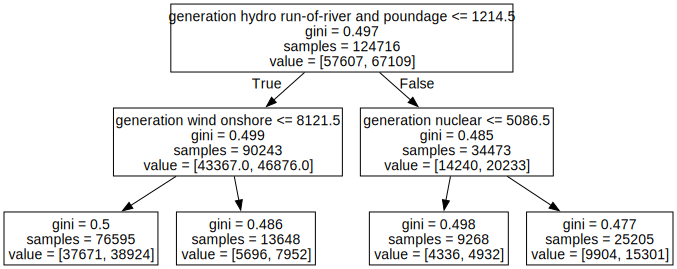

In [10]:
clf = tree.DecisionTreeClassifier(max_depth = 2)

clf.fit(X_train, y_train)

export_graphviz(clf, out_file="mytree.dot", feature_names=feature_data.columns)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Much simpler!

### Hyperparameter Tuning with Grid Search

A decision tree has several **hyperparameters** that control its structure and performance. Adjusting these hyperparameters can significantly affect the model's ability to generalize to unseen data. Here are some commonly tuned hyperparameters:

1. **Max Tree Depth**:
   - Defines how "tall" the tree can grow.
   - A deeper tree can model more complex patterns but is also more prone to overfitting.

2. **Minimum Samples Per Leaf**:
   - Specifies the minimum number of training samples required in a leaf node.
   - Higher values prevent the tree from creating overly specific splits.

3. **Minimum Samples to Split**:
   - Controls the minimum number of samples required to create a decision split at a node.
   - Higher values encourage simpler trees.

#### Cross-Validation
**Cross-validation** is a technique used to evaluate a model's performance. It involves splitting the data into multiple subsets (folds). The model is trained on some folds and validated on the remaining ones, rotating through all folds. This helps ensure the model is evaluated across the entire dataset, providing a more reliable estimate of its performance.

For example, in **5-fold cross-validation**, the dataset is split into five parts. The model is trained on four parts and validated on the fifth, repeating this process five times with a different validation fold each time.

#### Grid Search
Grid Search systematically tests all possible combinations of hyperparameters from a predefined grid to find the best configuration. While computationally expensive, it ensures no combinations are overlooked. Scikit-learn’s `GridSearchCV` makes this process efficient and user-friendly.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import tree
from time import time

# Initialize the model
clf = tree.DecisionTreeClassifier()

# Define the hyperparameter grid
hyperparameter_search = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 8, 11],
    'min_samples_leaf': [2, 5, 8, 11]
}

# Set up the evaluation metric (accuracy in this case)
evaluation_metric = make_scorer(accuracy_score, greater_is_better=True)

# Initialize Grid Search
grid_search_cv = GridSearchCV(estimator=clf,
                              param_grid=hyperparameter_search,
                              scoring=evaluation_metric,
                              n_jobs=-1,  # Use all available CPU cores
                              cv=5,  # Perform 5-fold cross-validation
                              verbose=3)

# Perform the grid search
start_time = time()
grid_search_cv.fit(X_train, y_train)
print(f'Grid search completed in {time() - start_time:.2f} seconds')

# Print the results
print("Best Parameters: ", grid_search_cv.best_params_)
print(f'Best Cross-Validation Accuracy: {grid_search_cv.best_score_ * 100:0.2f}%')

# Evaluate the best model on the test set
clf = grid_search_cv.best_estimator_
accuracy = accuracy_score(y_test, clf.predict(imp.transform(X_test)))
print(f'Accuracy on Test Set: {accuracy * 100:0.2f}%')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Grid search completed in 25.92 seconds
Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 56.21%
Accuracy on Test Set: 56.66%


### Grid Search Limitations

In the cell above, we tested two values for each hyperparameter and used Grid Search to find the best combination from the defined search space. While Grid Search is a thorough method, you may have noticed a key drawback:

#### Exponential Growth of Combinations
As you add more hyperparameters or increase the number of values tested for each hyperparameter, the number of combinations grows exponentially. For example:
- Testing 3 values for each of 3 hyperparameters requires \(3^3 = 27\) combinations.
- Testing 5 values for each of 4 hyperparameters requires \(5^4 = 625\) combinations.

This growth makes Grid Search computationally expensive and time-consuming, especially for:
- **Large Datasets**: Where training and validating a model is already slow.
- **Complex Models**: Like neural networks, where training can take hours or days per configuration.

#### Practical Implications
- Grid Search is generally more suitable for simpler models (e.g., decision trees, logistic regression) or smaller datasets where training is relatively fast.
- For more complex models like neural networks, alternative methods such as **Random Search** or **Bayesian Optimization** are often preferred. These methods explore the hyperparameter space more efficiently without testing every single combination.

---

In this section, we explored **decision trees** and how they can be used for classification tasks. Here’s a summary of what we covered:

1. **Training Decision Trees**:
   - We trained a decision tree to predict the presence of clouds based on energy generation data.
   - By limiting the tree’s depth, we ensured it was small enough to interpret and avoided overfitting.

2. **Interpreting Feature Importances**:
   - Decision trees provide insight into which features are most influential in making predictions, enhancing the model’s interpretability.

3. **Visualizing the Tree**:
   - We used Graphviz to visualize the decision tree, helping us understand how the model splits data and arrives at predictions.

4. **Hyperparameter Tuning**:
   - We explored the effect of tuning hyperparameters like `max_depth`, `min_samples_split`, and `min_samples_leaf` using **Grid Search**.
   - While effective, Grid Search can become computationally expensive as the number of parameters and their values grow.

#### Key Takeaways:
- **Strengths of Decision Trees**:
  - Easy to interpret and explain.
  - Require minimal data preprocessing (e.g., no feature scaling).
  - Can model non-linear relationships effectively.

- **Limitations**:
  - Prone to overfitting without proper constraints like limiting depth or minimum samples.
  - Sensitive to changes in the training data, which can result in different splits.



# Neural Networks with Keras

We’re now transitioning to using **neural networks** for making predictions with the **Keras** library. Keras is a high-level deep learning API, part of TensorFlow, that simplifies building, training, and evaluating neural networks. It’s widely used for both beginner and advanced machine learning tasks because of its clean and intuitive syntax.

In this section, we’ll use Keras to build a **feedforward neural network** to perform a **regression task**. Unlike classification, where the goal is to predict discrete labels, regression focuses on predicting continuous values. Here, we’ll predict the **total energy consumed** based on weather conditions, aligning with real-world energy forecasting tasks.

Keras provides:
- **Ease of Use**: Build and train models with just a few lines of code.
- **Flexibility**: Customize architectures for a wide range of problems.
- **Integration**: Compatible with TensorFlow for deployment and scaling.

With Keras, we can quickly experiment with different neural network architectures, adjust hyperparameters, and evaluate model performance using built-in utilities.

---

## Data Preparation

To prepare the data for this regression task:
1. **Define the Target (`y`)**:
   - The target variable is `total load actual`, representing the actual energy consumed.

2. **Define the Features (`X`)**:
   - Features include weather-related variables like temperature, wind speed, cloud cover, and precipitation.

In [12]:
target_data = df['total load actual']

city_name_columns = [col for col in df.columns if 'city_name' in col]
weather_main_columns = [col for col in df.columns if 'weather_main' in col]

feature_data = df[['temp', 'temp_min', 'temp_max', 'pressure',
                   'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
                   'clouds_all'] + city_name_columns + weather_main_columns]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=0)

In [14]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp.fit(X_train)
X_train = imp.transform(X_train) # replace missing data using our imputer
X_test = imp.transform(X_test)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Let's check our data to confirm it's what we expect.

In [16]:
pd.DataFrame(X_train, columns=feature_data.columns)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,...,weather_main_drizzle,weather_main_dust,weather_main_fog,weather_main_haze,weather_main_mist,weather_main_rain,weather_main_smoke,weather_main_snow,weather_main_squall,weather_main_thunderstorm
0,-0.364888,-0.276996,-0.459588,-0.007837,0.347035,-0.708875,1.144799,-0.189346,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,-0.328552,-0.013283,-0.039061,0.0,-0.076679
1,-2.124253,-2.035078,-2.082888,-0.010060,0.940041,-0.708875,1.401884,-0.189346,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,-0.328552,-0.013283,-0.039061,0.0,-0.076679
2,1.574894,1.104354,2.323213,-0.009376,-0.838977,-1.192394,-1.254670,-0.189346,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,-0.328552,-0.013283,-0.039061,0.0,-0.076679
3,-0.901244,-0.747997,-1.010430,-0.008692,-0.245971,-0.708875,0.219289,-0.189346,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,-0.328552,-0.013283,-0.039061,0.0,-0.076679
4,-1.429963,-1.407191,-1.387188,-0.007495,1.122505,-0.708875,-1.151835,-0.189346,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,-0.328552,-0.013283,-0.039061,0.0,-0.076679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,-0.247929,-0.151418,-0.343638,-0.009718,1.122505,-0.225356,0.904852,0.566079,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,3.043657,-0.013283,-0.039061,0.0,-0.076679
124712,-1.182358,-1.156037,-1.155288,-0.006640,0.575115,0.258163,0.630627,-0.189346,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,-0.328552,-0.013283,-0.039061,0.0,-0.076679
124713,0.809682,0.978777,0.583963,-0.009547,-0.565282,-0.708875,-1.168974,-0.189346,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,-0.328552,-0.013283,-0.039061,0.0,-0.076679
124714,-0.683415,-0.528150,-0.807438,-0.010574,0.848810,0.741682,0.544931,0.566079,-0.047736,-0.02217,...,-0.098898,-0.044093,-0.118429,-0.049023,-0.14943,3.043657,-0.013283,-0.039061,0.0,-0.076679


In [17]:
y_train

132952    29365.0
93470     22151.0
58432     29097.0
8805      25526.0
91972     26114.0
           ...   
152315    29756.0
176963    24115.0
117952    32949.0
173685    27464.0
43567     20664.0
Name: total load actual, Length: 124716, dtype: float64

# Building a Neural Network with Keras

With our `X` (features) and `y` (target) data prepared, we are now ready to build a **neural network** for our regression task. We’ll use the **Keras** library, which provides a high-level API for constructing and training neural networks. Specifically, we’ll use Keras’s **Sequential** model to create a simple feedforward neural network.

The **Sequential** model is ideal for building neural networks where layers are stacked sequentially—each layer feeds its output to the next layer. This is perfect for straightforward architectures like feedforward networks.

In this task:
- **Input Layer**: Takes in the feature data (`X`).
- **Hidden Layer**: Processes the data to learn patterns.
- **Output Layer**: Predicts the target value (total energy consumed).

---

## Data Shape
Before building the model, we need to record some essential information about the shape of our data:
- **Input Shape**: The number of features in `X_train`, which determines the size of the input layer.
- **Output Shape**: The number of target variables we’re predicting. For this regression task, it’s a single value.


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input

input_shape = X_train.shape[1]
output_shape = 1 # We are predicting a single value

2024-12-01 14:34:49.094794: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Building a Neural Network Model

Now that we’ve explored the data, let’s build a simple neural network model to classify the iris dataset. We’ll use Keras, a high-level API for building and training neural networks in Python.

#### Key Components:
- **`Sequential`**: A linear stack of layers where each layer feeds into the next.
- **`Dense`**: Fully connected layers where each neuron connects to every neuron in the previous and next layers.
- **`Input`**: Defines the shape of the input data for the first layer.
- **Activation Function**: We’ll use the **ReLU** (Rectified Linear Unit) activation function for the hidden layer, which introduces non-linearity into the model.

#### Model Architecture:
1. **Input Layer**:
   - The input layer size (`input_shape`) should match the number of features in the input data.
2. **Hidden Layer**:
   - We’ll include one hidden layer with 10 neurons, each applying the ReLU activation function.
3. **Output Layer**:
   - The output layer size (`output_shape`) depends on the number of classes in the dataset (e.g., 3 for iris classification).

#### Compiling the Model:
- **Optimizer**: Stochastic Gradient Descent (`'sgd'`) will be used to update weights during training.
- **Loss Function**: Mean Absolute Error (`'mean_absolute_error'`) will evaluate how far predictions are from the true values.

In [19]:
# Build the model
model = Sequential(
    [
        Input(shape=(input_shape,)),  # Input layer
        Dense(10),                    # Hidden layer with 10 neurons
        Activation('relu'),           # ReLU activation
        Dense(output_shape)           # Output layer with one neuron per class
    ]
)

# Compile the model
model.compile(optimizer='sgd', loss='mean_absolute_error')

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

### Understanding the Model Summary

The model summary provides an overview of the architecture of your neural network. Here's what each part means in simple terms:

#### Key Terms:
- **Layer (type)**: This column lists the layers in your model and their types. For example:
  - `Dense`: A fully connected layer where every neuron connects to every neuron in the previous and next layers.
  - `Activation`: Applies a mathematical function (like ReLU) to the outputs of the previous layer.
- **Output Shape**: This column describes the size of the output from each layer:
  - `(None, 10)`: The `None` represents the batch size (which is dynamic and can vary during training), while `10` is the number of neurons in that layer.
- **Param #**: This column shows the number of trainable parameters (weights and biases) in each layer.

#### Layer Breakdown:
1. **First Dense Layer (`dense`)**:
   - **Output Shape**: `(None, 10)` → The layer has 10 neurons.
   - **Param #**: `290` → The parameters are calculated as:
     - $ \text{(Number of inputs)} \times \text{(Number of neurons)} + \text{(Number of biases)} $
     - $ 28 \times 10 + 10 = 290 $, where 28 is the number of features from the input.
2. **Activation Layer (`activation`)**:
   - **Output Shape**: `(None, 10)` → The same size as the previous layer because this layer just applies the ReLU function.
   - **Param #**: `0` → No parameters are learned here; it's just applying a function.
3. **Second Dense Layer (`dense_1`)**:
   - **Output Shape**: `(None, 1)` → A single output neuron, typically used for predictions.
   - **Param #**: `11` → The parameters are calculated as:
     - $ 10 \times 1 + 1 = 11 $, where 10 is the number of neurons from the previous layer.

#### Totals:
- **Total Params**: `301` → The sum of all trainable parameters in the network.
- **Trainable Params**: `301` → All the parameters in this model can be updated during training.
- **Non-Trainable Params**: `0` → There are no fixed parameters in this model.

### Training the Model

The `model.fit()` function is where the magic happens—this is where the model learns from the training data by adjusting its weights to minimize the error (loss). Let’s break down the parameters in this code:

#### Parameters Explained:
- **`X_train, y_train`**: These are the input features (`X_train`) and corresponding target labels (`y_train`) used for training the model. The model uses this data to learn patterns and make predictions.
- **`epochs=5`**: An **epoch** is one complete pass through the entire training dataset. Setting this to `5` means the model will go through the dataset five times.
- **`batch_size=128`**: The data is divided into **batches** of 128 samples. The model updates its weights after processing each batch, which can speed up training compared to using the entire dataset at once.
- **`validation_data=(X_test, y_test)`**: This is the data used to evaluate the model’s performance after each epoch. It is not used for training, which helps prevent overfitting and ensures the model generalizes well to unseen data.

#### What Happens During Training:
1. **Forward Pass**:
   - The model processes a batch of data, makes predictions, and computes the loss (difference between predictions and actual labels).
2. **Backward Pass**:
   - The model calculates gradients of the loss with respect to its parameters and updates the parameters using the optimizer (in this case, stochastic gradient descent).
3. **Validation**:
   - After each epoch, the model evaluates its performance on the validation data to track how well it generalizes.


In [20]:
model.fit(
    X_train, y_train,                 # Training data
    epochs=5,                         # Train for 5 complete passes through the data
    batch_size=128,                   # Update weights after every 128 samples
    validation_data=(X_test, y_test)  # Use separate data for validation
)

Epoch 1/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25390.4980 - val_loss: 3728.2068
Epoch 2/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3659.0762 - val_loss: 3626.1997
Epoch 3/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3621.7849 - val_loss: 3624.3640
Epoch 4/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3616.5535 - val_loss: 3613.3340
Epoch 5/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3592.4807 - val_loss: 3609.5771


### Evaluating the Model: Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)

To assess how well our model is performing on the testing data, we calculate two common evaluation metrics:

1. **Mean Absolute Error (MAE)**:
   - This metric gives the average absolute difference between the predicted values (`y_pred`) and the true values (`y_test`).
   - It is measured in the same units as the target variable, making it easy to interpret.

   Formula:
   $$
   \text{MAE} = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
   $$
   Where:
   - $ y_i $: True value
   - $ \hat{y}_i $: Predicted value
   - $ n $: Number of samples

2. **Mean Absolute Percentage Error (MAPE)**:
   - This metric provides the average percentage difference between predictions and true values. It’s particularly useful when you want to understand error relative to the size of the true values.
   - The result is expressed as a percentage.

   Formula:
   $$
   \text{MAPE} = \frac{1}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100
   $$



In [21]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

y_pred = model.predict(X_test)
print(f'MAE:  {mean_absolute_error(y_test, y_pred):.02f}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)*100:.02f}%')

1671/1671 ━━━━━━━━━━━━━━━━━━━━ 1s 505us/step
MAE:  3609.58
MAPE: 12.86%


In [36]:
import numpy as np

# Select a single test sample
sample_index = 0
single_input = X_test[sample_index]  # Shape: (number of features,)
true_value = y_test[sample_index]

# Forward pass through the network
print(f"Input features:\n{single_input}")

# Layer 1: Compute the weighted sum + bias, then apply ReLU
hidden_layer_weights = model.layers[0].get_weights()[0]
hidden_layer_biases = model.layers[0].get_weights()[1]

# Build the equation for the hidden layer
equations = []
for neuron_index in range(hidden_layer_weights.shape[1]):
    terms = [
        f"{hidden_layer_weights[feature_index, neuron_index]:.2f}*x{feature_index + 1}"
        for feature_index in range(hidden_layer_weights.shape[0])
    ]
    bias = hidden_layer_biases[neuron_index]
    equation = " + ".join(terms) + f" + {bias:.2f}"
    equations.append(f"\nNeuron {neuron_index + 1}:\n{equation}")

# Print the equations for each neuron in the hidden layer
for eq in equations:
    print(eq)

hidden_layer_output = np.dot(single_input, hidden_layer_weights) + hidden_layer_biases
print(f"\nEquation results (pre-activation):\n{hidden_layer_output}")
hidden_layer_output = np.maximum(0, hidden_layer_output)  # ReLU activation
print(f"\nEquation results (post-activation):\n{hidden_layer_output}")

# Output layer: Compute the final weighted sum + bias
output_layer_weights = model.layers[2].get_weights()[0]
output_layer_biases = model.layers[2].get_weights()[1]

output_terms = [
    f"{output_layer_weights[hidden_index, 0]:.2f}*h{hidden_index + 1}"
    for hidden_index in range(output_layer_weights.shape[0])
]
output_bias = output_layer_biases[0]
output_equation = " + ".join(output_terms) + f" + {output_bias:.2f}"

# Print the output layer equation
print(f"\nOutput: {output_equation}")

output = np.dot(hidden_layer_output, output_layer_weights) + output_layer_biases
print(f"\nOutput (prediction): {output[0]:.0f}")

# Compare the prediction with the true value
print(f"True value:          {true_value:.0f}")

Input features:
[-0.82899196 -0.79311838 -0.63351258 -0.0088634  -0.10912309 -0.70887522
 -1.42606031 -0.18934579 -0.04773581 -0.02216982 -0.8142071  -0.49985968
 -0.50243937  1.9805747  -0.50003508 -0.49274515  1.07382362 -0.78434643
 -0.09889764 -0.04409287 -0.11842895 -0.04902253 -0.14943003 -0.32855216
 -0.01328277 -0.03906131  0.         -0.07667887]

Neuron 1:
-16.57*x1 + -12.29*x2 + -15.18*x3 + -1.56*x4 + -6.04*x5 + 1.30*x6 + 0.11*x7 + 1.59*x8 + -0.32*x9 + -0.33*x10 + 11.21*x11 + -4.05*x12 + -3.39*x13 + 3.02*x14 + 10.64*x15 + -6.28*x16 + -10.25*x17 + 1.76*x18 + 3.45*x19 + 1.45*x20 + 4.07*x21 + 0.47*x22 + 4.65*x23 + 8.53*x24 + -0.49*x25 + 2.21*x26 + 0.03*x27 + 1.49*x28 + 58.51

Neuron 2:
2.96*x1 + 4.93*x2 + 2.81*x3 + -0.49*x4 + -0.88*x5 + 4.48*x6 + -2.25*x7 + 0.14*x8 + -0.32*x9 + -0.70*x10 + 5.01*x11 + 1.76*x12 + 2.44*x13 + -9.01*x14 + 0.94*x15 + 4.28*x16 + -7.73*x17 + 5.84*x18 + 0.90*x19 + 0.51*x20 + -1.99*x21 + 0.75*x22 + 1.22*x23 + 2.98*x24 + -0.98*x25 + -0.07*x26 + -0.37*x27 

## Conclusion

In this lab, we explored and implemented two powerful machine learning techniques: **Decision Trees** and **Neural Networks**. Through hands-on coding and analysis, we gained insights into their strengths, limitations, and practical applications. Here’s a summary of what we accomplished:

### Key Takeaways

#### Decision Trees
1. **How They Work**:
   - Decision trees split data based on feature thresholds, creating a tree-like structure to make predictions.
   - They are intuitive and interpretable, making them suitable for explaining decisions.

2. **Implementation**:
   - We trained a decision tree to predict cloud presence using weather and energy generation data.
   - We visualized the tree structure, which helped us understand the model’s decision-making process.

3. **Limitations**:
   - Decision trees can overfit without constraints like limiting depth or requiring minimum samples per split.
   - They are sensitive to small changes in the data.

#### Neural Networks
1. **How They Work**:
   - Neural networks process data through layers of neurons, each applying mathematical transformations and activation functions to learn patterns.
   - They excel at capturing complex, non-linear relationships in data.

2. **Implementation**:
   - We built and trained a feedforward neural network using Keras to predict energy consumption based on weather features.
   - By visualizing the flow of a single prediction through the network, we demystified how inputs are transformed layer by layer into outputs.

3. **Evaluation**:
   - Using metrics like Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE), we evaluated the network’s performance, understanding the accuracy and scale of predictions.

### Comparing Decision Trees and Neural Networks
- **Strengths**:
  - Decision Trees: Simple, interpretable, require little data preprocessing.
  - Neural Networks: Flexible, powerful for complex tasks, adaptable to various problem types.

- **Limitations**:
  - Decision Trees: Susceptible to overfitting, less effective for highly non-linear problems.
  - Neural Networks: Require more data and computational resources, harder to interpret.

### Bonus Task: Extending the Neural Network

To deepen your understanding of neural networks, try **extending the architecture** of the model you built. You can either:
1. Add additional hidden layers to increase the model's depth.
2. Increase the number of neurons in the existing hidden layer(s) to make the model wider.

#### Directions:
1. **Adding a New Hidden Layer**:
   - Insert a new `Dense` layer between the existing layers.
   - Use the `Activation` layer to apply the ReLU activation function to this new layer.
   - Ensure the number of neurons in the new layer fits your design (e.g., 20 or 30 neurons).
   - Remember that deeper networks can learn more complex patterns but might require more epochs to train effectively.

2. **Increasing the Width of an Existing Layer**:
   - Modify the number of neurons in the hidden layer(s) by increasing the first argument in the `Dense` function (e.g., from 10 to 50 neurons).
   - Wider layers can capture more details from the input but may also increase the risk of overfitting.

3. **Re-compiling the Model**:
   - After making changes to the architecture, recompile the model using the same optimizer and loss function.

4. **Retraining the Model**:
   - Fit the updated model on the training data using the same number of epochs and batch size.
   - Compare the training and validation metrics with the original model to assess the impact of the changes.

5. **Optional Exploration**:
   - Try using a different activation function, such as `tanh` or `sigmoid`, in the new layers.

#### Questions to Answer:
- Did the additional layers or neurons improve the model’s performance? Why or why not?
- How did the changes affect training time and validation metrics?
- What trade-offs did you observe between model complexity and generalization?

Feel free to document your findings and share them with the group for discussion!
